In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def n_pdf(x, mu=0., sigma=1.):  # normal pdf
    u = (x - mu) / abs(sigma)
    y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
    y *= np.exp(-u * u / 2)
    return y

def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd

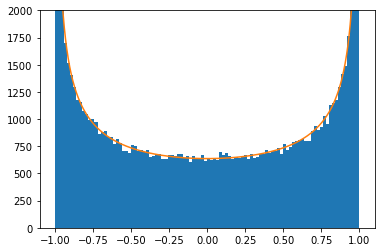

In [39]:
# uniform distribution
sample_size = 100000
n_bin = 100
data = np.random.uniform(0, 2*np.pi, size=sample_size)
# set y = sin(x)
y = np.sin(data)
x_values = np.linspace(-1+1e-2, 1-1e-2, 1000)
#theo = (1/2*np.pi)/(np.cos(x_values))*100*(max(data)-min(data))/30
theo = 1/(np.pi)/np.sqrt(1-(x_values)**2)*sample_size*2/n_bin


# plt.plot(test)
plt.hist(y, bins=n_bin)
plt.plot(x_values, theo)
plt.ylim([0, 2000])
plt.show()


In [8]:
data

array([2.61378631, 1.06388048, 3.81770753, ..., 4.94184769, 3.80771071,
       4.20344527])

In [52]:
def clipping_func(data):
    clipped_data = []
    for x in data:
        if np.sin(x) > 10.7:
            clipped_data.append(0.7)
        else:
            clipped_data.append(np.sin(x))
    return clipped_data

C:\Users\Youjing Yu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


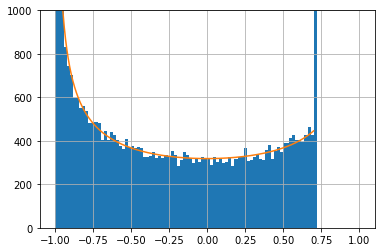

In [63]:
# uniform distribution
sample_size = 50000
n_bin = 100
bins = np.linspace(-1, 1, n_bin+1)
data = np.random.uniform(0, 2*np.pi, size=sample_size)
# y = clipping_func(data)
y = np.sin(data)
y[y > 0.7] = 0.7
x_values = np.linspace(-1, 0.7, 1000)
theo = 1/(np.pi)/np.sqrt(1-(x_values)**2)*sample_size*2/n_bin

for i in theo:
    if i >= 0.7:
        i = 0.7

# plt.plot(test)
plt.hist(y, bins=bins)
plt.plot(x_values, theo)
plt.ylim([0, 1000])
plt.grid()
plt.show()

In [65]:
npy = np.array(y)
n_0_7 = len(npy[npy==0.7])
print(n_0_7)
P_0_7 = n_0_7/sample_size

12708


In [66]:
P_0_7

0.25416